In [2]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras


In [3]:
from keras.models import Model

In [4]:
from keras.models import Sequential
#this gives our network as a sequential network

from keras.layers import Conv2D
#we are working on images so it is in 2D 

from keras.layers import MaxPooling2D

from keras.layers import Flatten
#it is process of coverting all resultant 2d arrays as single long continuous linear vector  

from keras.layers import Dense, Dropout
#full connection of nn is done by dense

In [48]:
vgg19 = tf.keras.applications.VGG19(
    include_top = False, 
    weights = 'imagenet', 
    input_shape = (224,224,3),
    pooling = None, 
)

80150528/80134624 [==============================] - 0s 0us/step


In [49]:
vgg19.trainable = False

In [50]:
classes = os.listdir('../input/rice-diseases/train dataset - Copy')
num_class=len(classes)
num_class

10

In [51]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [52]:
x=Flatten()(vgg19.output)

In [53]:
x=tf.keras.layers.Dropout(0.09)(x)

In [54]:
predictions = Dense(10, activation="softmax")(x)

In [55]:
model_vgg = Model(vgg19.input, predictions)

In [56]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [57]:
img=ImageDataGenerator(rescale=1./255)

In [7]:
SEED = 548
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224

In [8]:
train_ds = img.flow_from_directory('../input/split-seg-images-bef-aug/train dataset seg 2/train',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 7286 images belonging to 10 classes.


In [9]:
val_ds = img.flow_from_directory('../input/split-seg-images-bef-aug/train dataset seg 2/val',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 1037 images belonging to 10 classes.


In [10]:
test_ds = img.flow_from_directory('../input/split-seg-images-bef-aug/train dataset seg 2/test',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 2093 images belonging to 10 classes.


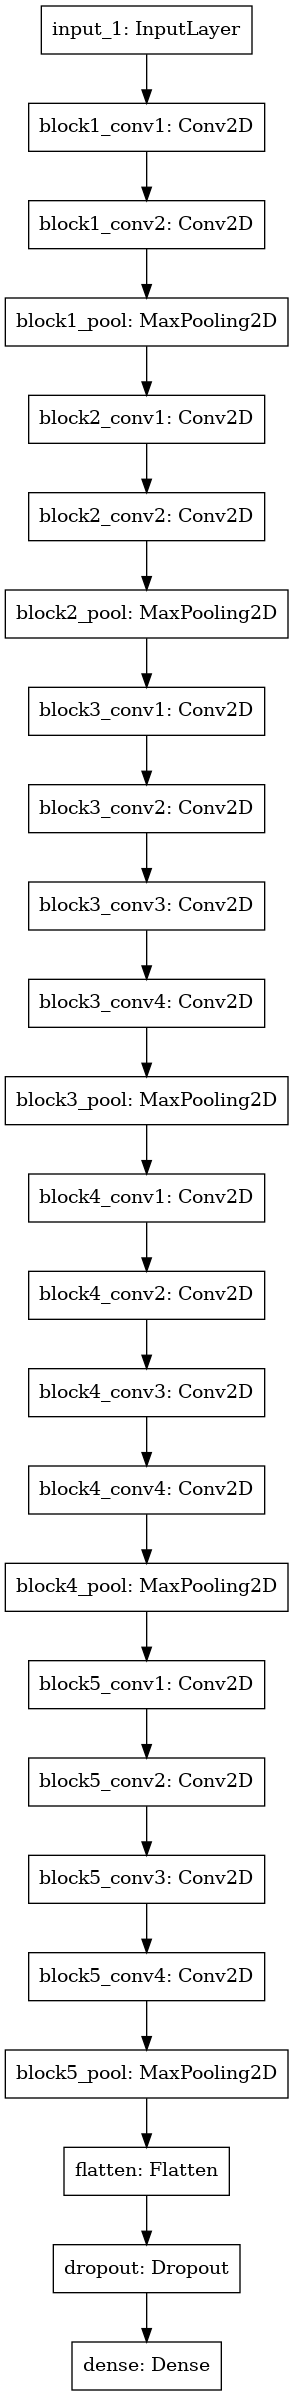

In [143]:
tf.keras.utils.plot_model(model_vgg)

In [58]:
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
history_vgg= model_vgg.fit(train_ds,steps_per_epoch=113,
                           epochs=40,
                            validation_data = val_ds)

Epoch 1/40
113/113 [==============================] - 92s 766ms/step - loss: 1.6821 - accuracy: 0.4763 - val_loss: 1.2087 - val_accuracy: 0.6056
Epoch 2/40
113/113 [==============================] - 76s 673ms/step - loss: 0.8533 - accuracy: 0.7430 - val_loss: 0.8796 - val_accuracy: 0.7232
Epoch 3/40
113/113 [==============================] - 75s 664ms/step - loss: 0.6097 - accuracy: 0.8307 - val_loss: 0.8249 - val_accuracy: 0.7695
Epoch 4/40
113/113 [==============================] - 75s 667ms/step - loss: 0.4547 - accuracy: 0.8852 - val_loss: 0.6324 - val_accuracy: 0.8158
Epoch 5/40
113/113 [==============================] - 74s 658ms/step - loss: 0.3710 - accuracy: 0.9107 - val_loss: 0.7148 - val_accuracy: 0.7695
Epoch 6/40
113/113 [==============================] - 77s 681ms/step - loss: 0.2864 - accuracy: 0.9360 - val_loss: 0.5670 - val_accuracy: 0.8409
Epoch 7/40
113/113 [==============================] - 75s 665ms/step - loss: 0.2417 - accuracy: 0.9506 - val_loss: 0.5195 - val_ac

In [60]:
import matplotlib.pyplot as plt
import numpy as np

metrics of VGG-19


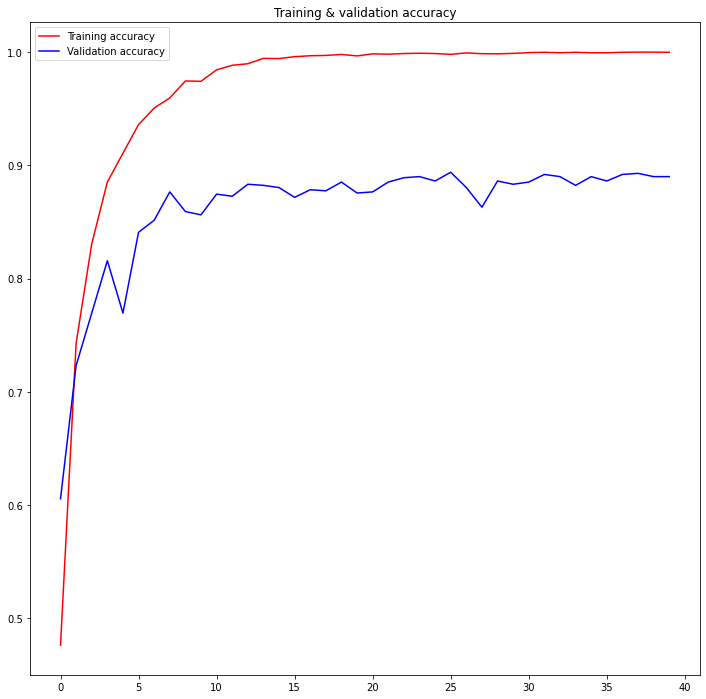

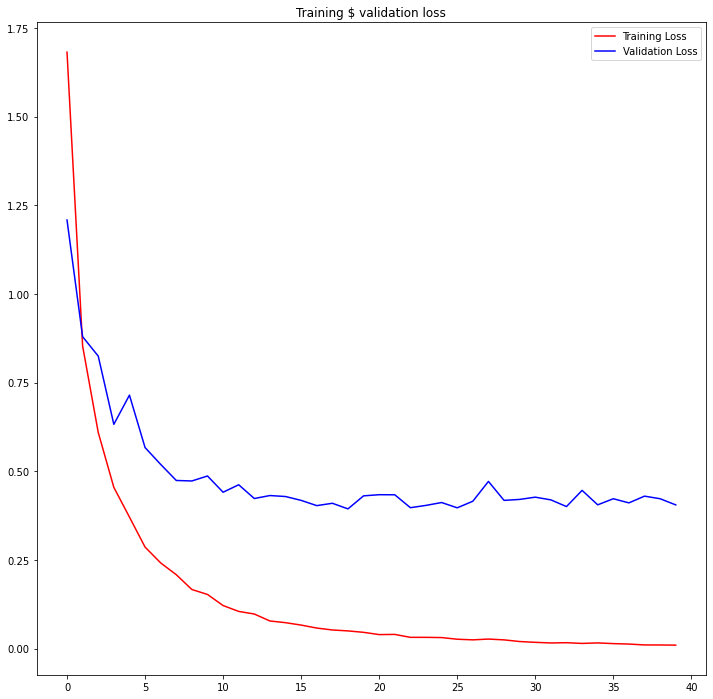

In [61]:
print("metrics of VGG-19")
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()
plt.show()

In [62]:
model_vgg.evaluate(test_ds)

33/33 [==============================] - 25s 753ms/step - loss: 0.4247 - accuracy: 0.8892


[0.424650102853775, 0.889154314994812]

In [22]:
model_vgg.evaluate(test_ds)

33/33 [==============================] - 37s 1s/step - loss: 0.4361 - accuracy: 0.8815


[0.4361450672149658, 0.8815097808837891]

In [63]:
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)

predictions = model_vgg.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)

In [64]:
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())

In [85]:
len(class_labels)

10

In [65]:
import sklearn.metrics

In [66]:
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.94      0.81      0.87        99
   bacterial_leaf_streak       0.94      0.87      0.90        76
bacterial_panicle_blight       0.92      0.86      0.89        69
                   blast       0.86      0.93      0.90       349
              brown_spot       0.87      0.86      0.86       194
              dead_heart       0.91      0.91      0.91       289
            downy_mildew       0.82      0.86      0.84       124
                   hispa       0.88      0.88      0.88       320
                  normal       0.92      0.89      0.90       354
                  tungro       0.88      0.91      0.89       219

                accuracy                           0.89      2093
               macro avg       0.90      0.88      0.88      2093
            weighted avg       0.89      0.89      0.89      2093



In [67]:
import seaborn as sns

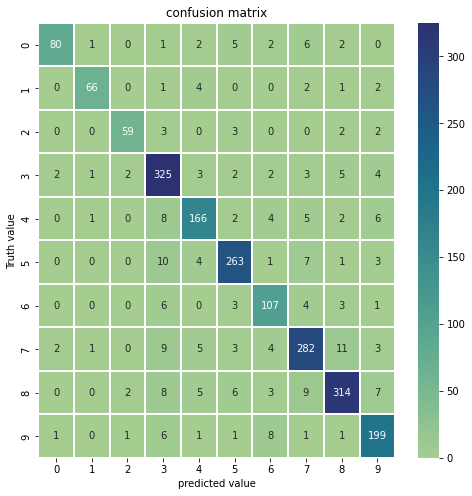

[[ 80   1   0   1   2   5   2   6   2   0]
 [  0  66   0   1   4   0   0   2   1   2]
 [  0   0  59   3   0   3   0   0   2   2]
 [  2   1   2 325   3   2   2   3   5   4]
 [  0   1   0   8 166   2   4   5   2   6]
 [  0   0   0  10   4 263   1   7   1   3]
 [  0   0   0   6   0   3 107   4   3   1]
 [  2   1   0   9   5   3   4 282  11   3]
 [  0   0   2   8   5   6   3   9 314   7]
 [  1   0   1   6   1   1   8   1   1 199]]


In [68]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


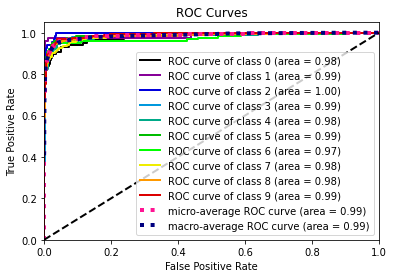

In [69]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [19]:
from tensorflow.keras.applications import InceptionV3
inc = InceptionV3(input_shape=(224,224,3),weights='imagenet',include_top=False)
for i in inc.layers:
    i.trainable = False
    
    
model_Inception = tf.keras.models.Sequential([
    inc,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
tf.keras.utils.plot_model(inc)

In [20]:
model_Inception.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
batch_normalization_189 (Bat (None, 5, 5, 2048)        8192      
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6553728   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 28,365,994
Trainable params: 6,559,114
Non-trainable params: 21,806,880
__________________________________

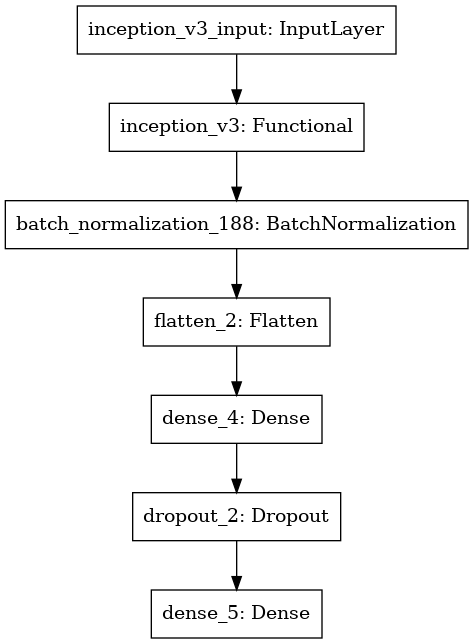

In [64]:
tf.keras.utils.plot_model(model_Inception)

In [21]:
model_Inception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history_Inception=model_Inception.fit(train_ds,validation_data=val_ds,epochs=40,steps_per_epoch=7286//64)

Epoch 1/40
113/113 [==============================] - 80s 679ms/step - loss: 2.2867 - accuracy: 0.3204 - val_loss: 1.5255 - val_accuracy: 0.5111
Epoch 2/40
113/113 [==============================] - 75s 660ms/step - loss: 1.3418 - accuracy: 0.5360 - val_loss: 1.2413 - val_accuracy: 0.5959
Epoch 3/40
113/113 [==============================] - 75s 664ms/step - loss: 1.0669 - accuracy: 0.6205 - val_loss: 1.1468 - val_accuracy: 0.6355
Epoch 4/40
113/113 [==============================] - 75s 664ms/step - loss: 0.8965 - accuracy: 0.6840 - val_loss: 0.9993 - val_accuracy: 0.6895
Epoch 5/40
113/113 [==============================] - 74s 656ms/step - loss: 0.7432 - accuracy: 0.7303 - val_loss: 0.9324 - val_accuracy: 0.7088
Epoch 6/40
113/113 [==============================] - 74s 653ms/step - loss: 0.6463 - accuracy: 0.7677 - val_loss: 1.0607 - val_accuracy: 0.7242
Epoch 7/40
113/113 [==============================] - 72s 641ms/step - loss: 0.5861 - accuracy: 0.7879 - val_loss: 0.9007 - val_ac

In [23]:
import matplotlib.pyplot as plt
import numpy as np

metrics of VGG-19


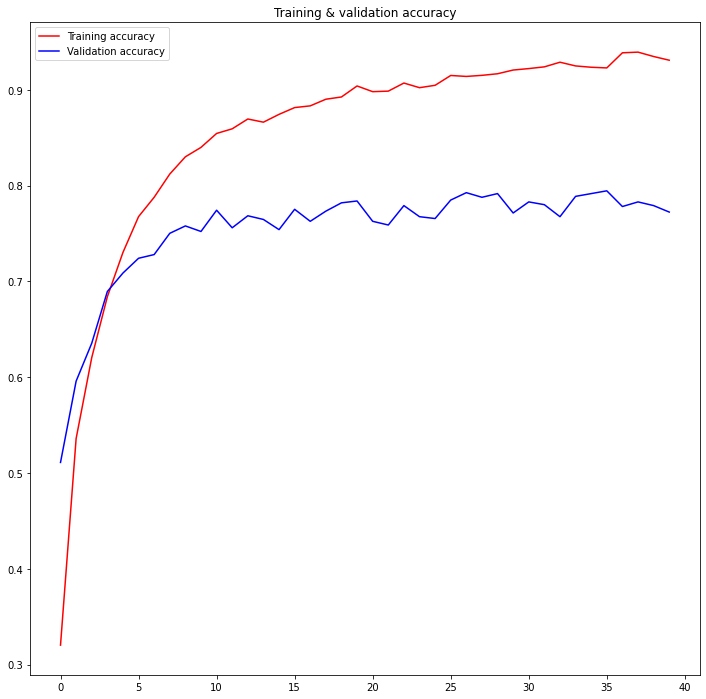

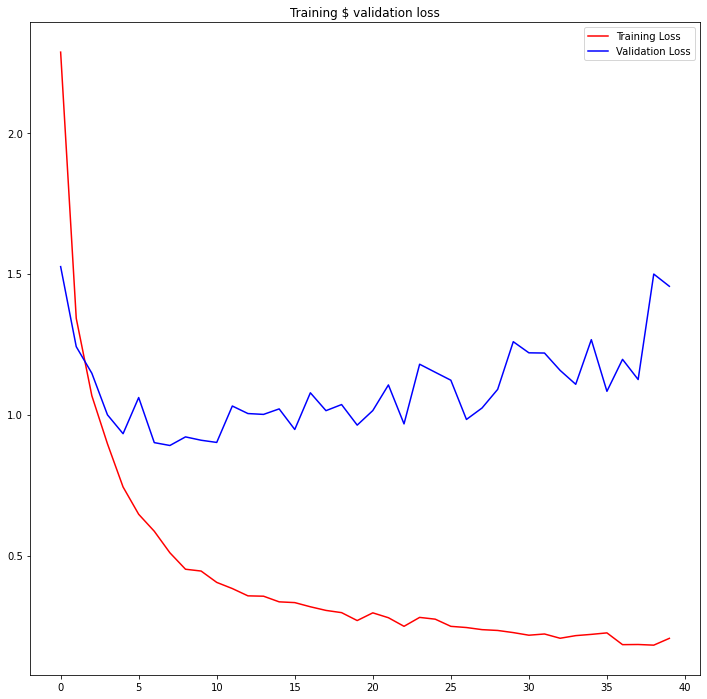

In [24]:
print("metrics of VGG-19")
acc = history_Inception.history['accuracy']
val_acc = history_Inception.history['val_accuracy']
loss = history_Inception.history['loss']
val_loss = history_Inception.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()
plt.show()

In [25]:
model_Inception.evaluate(test_ds)

33/33 [==============================] - 34s 1s/step - loss: 1.5530 - accuracy: 0.7860


[1.5529534816741943, 0.785953164100647]

In [43]:
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)

predictions_inc = model_Inception.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes_inc = np.argmax(predictions_inc, axis=1)

In [44]:
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())

In [45]:
report = sklearn.metrics.classification_report(true_classes, predicted_classes_inc, target_names = class_labels)
print(report) 

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.91      0.60      0.72        99
   bacterial_leaf_streak       0.92      0.63      0.75        76
bacterial_panicle_blight       0.69      0.75      0.72        69
                   blast       0.79      0.84      0.82       349
              brown_spot       0.83      0.65      0.73       194
              dead_heart       0.81      0.88      0.84       289
            downy_mildew       0.82      0.65      0.73       124
                   hispa       0.77      0.79      0.78       320
                  normal       0.84      0.79      0.82       354
                  tungro       0.66      0.90      0.76       219

                accuracy                           0.79      2093
               macro avg       0.80      0.75      0.77      2093
            weighted avg       0.80      0.79      0.78      2093



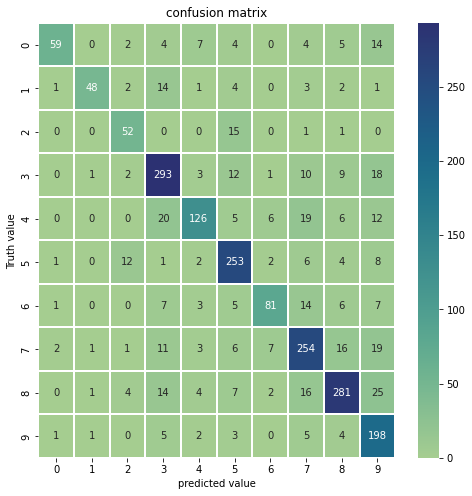

[[ 59   0   2   4   7   4   0   4   5  14]
 [  1  48   2  14   1   4   0   3   2   1]
 [  0   0  52   0   0  15   0   1   1   0]
 [  0   1   2 293   3  12   1  10   9  18]
 [  0   0   0  20 126   5   6  19   6  12]
 [  1   0  12   1   2 253   2   6   4   8]
 [  1   0   0   7   3   5  81  14   6   7]
 [  2   1   1  11   3   6   7 254  16  19]
 [  0   1   4  14   4   7   2  16 281  25]
 [  1   1   0   5   2   3   0   5   4 198]]


In [46]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes_inc)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes_inc))

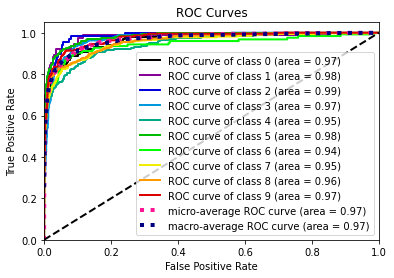

<Figure size 1440x1440 with 0 Axes>

In [47]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions_inc
skplt.metrics.plot_roc(y_true, y_probas)
plt.figure(figsize=(20,20))
plt.show()

In [26]:
model_cnn = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
# tf.keras.layers.Dense(8192, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

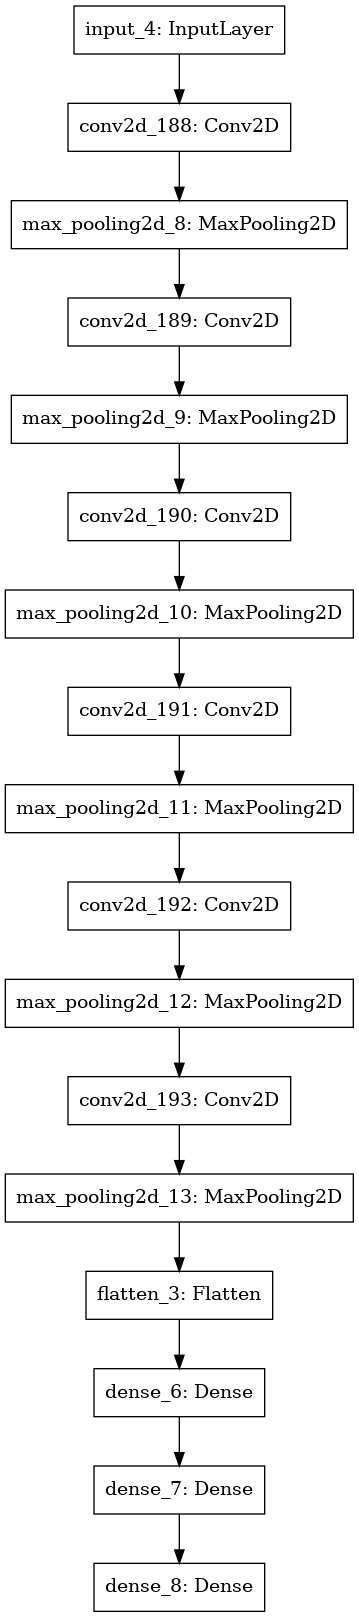

In [63]:
tf.keras.utils.plot_model(model_cnn)

In [27]:
model_cnn.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history_cnn = model_cnn.fit(
    train_ds,
    steps_per_epoch = 7286//64,
    epochs = 40,
    validation_data = val_ds
)

Epoch 1/40
113/113 [==============================] - 74s 648ms/step - loss: 2.1802 - accuracy: 0.1633 - val_loss: 2.1530 - val_accuracy: 0.1697
Epoch 2/40
113/113 [==============================] - 73s 641ms/step - loss: 2.1456 - accuracy: 0.1900 - val_loss: 2.1003 - val_accuracy: 0.2343
Epoch 3/40
113/113 [==============================] - 72s 638ms/step - loss: 2.0456 - accuracy: 0.2613 - val_loss: 2.0026 - val_accuracy: 0.2671
Epoch 4/40
113/113 [==============================] - 72s 642ms/step - loss: 1.9593 - accuracy: 0.3035 - val_loss: 1.9798 - val_accuracy: 0.2941
Epoch 5/40
113/113 [==============================] - 73s 644ms/step - loss: 1.9117 - accuracy: 0.3233 - val_loss: 1.9259 - val_accuracy: 0.3134
Epoch 6/40
113/113 [==============================] - 72s 642ms/step - loss: 1.7776 - accuracy: 0.3775 - val_loss: 1.8399 - val_accuracy: 0.3337
Epoch 7/40
113/113 [==============================] - 73s 647ms/step - loss: 1.6540 - accuracy: 0.4173 - val_loss: 1.7059 - val_ac

metrics of VGG-19


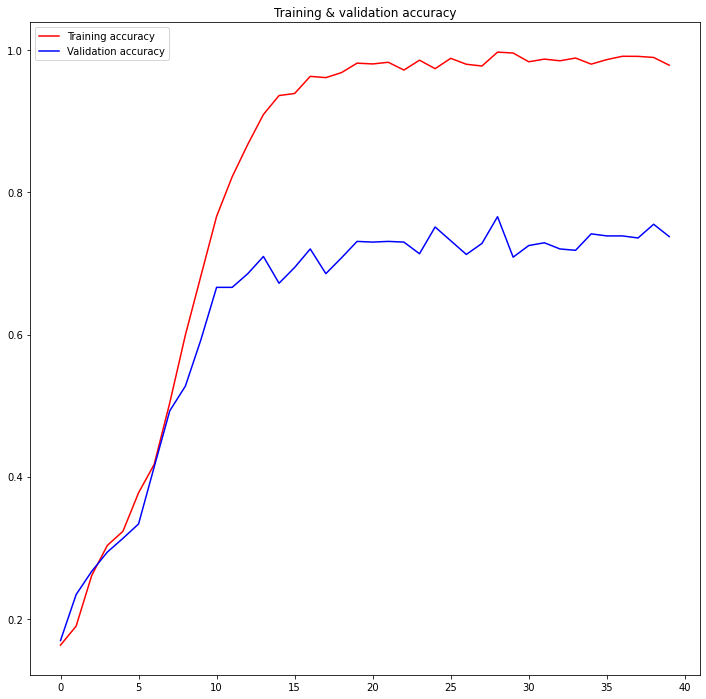

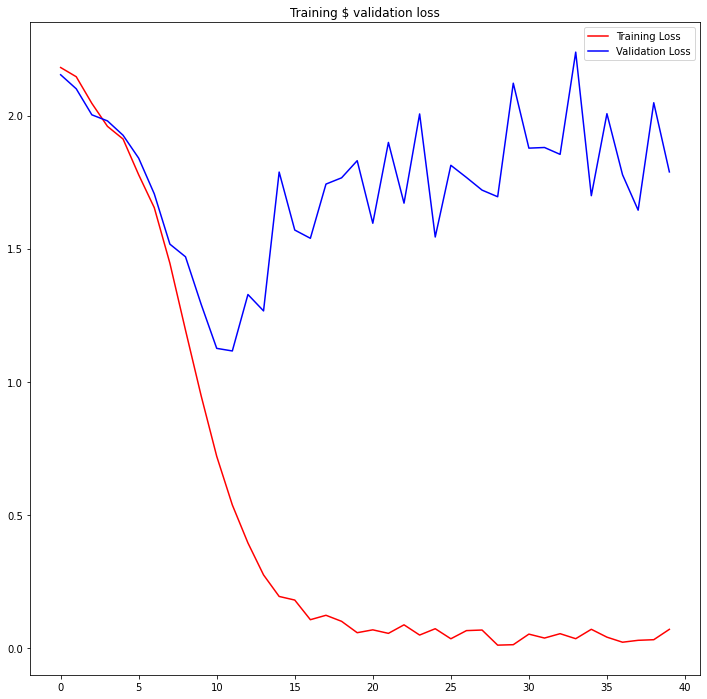

In [30]:
print("metrics of VGG-19")
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()
plt.show()

In [31]:
model_cnn.evaluate(test_ds)

33/33 [==============================] - 19s 589ms/step - loss: 1.6625 - accuracy: 0.7563


[1.6624972820281982, 0.7563306093215942]

In [55]:
model_cnn.evaluate(test_ds)

33/33 [==============================] - 18s 543ms/step - loss: 1.6819 - accuracy: 0.7473


[1.6818597316741943, 0.7472527623176575]

In [33]:
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)
predictions_cnn = model_cnn.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

In [35]:
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())

In [38]:
report = sklearn.metrics.classification_report(true_classes, predicted_classes_cnn, target_names = class_labels)
print(report) 

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.72      0.67      0.69        99
   bacterial_leaf_streak       0.61      0.82      0.70        76
bacterial_panicle_blight       0.66      0.77      0.71        69
                   blast       0.82      0.82      0.82       349
              brown_spot       0.82      0.70      0.76       194
              dead_heart       0.77      0.75      0.76       289
            downy_mildew       0.76      0.77      0.76       124
                   hispa       0.78      0.73      0.76       320
                  normal       0.70      0.83      0.76       354
                  tungro       0.78      0.65      0.71       219

                accuracy                           0.76      2093
               macro avg       0.74      0.75      0.74      2093
            weighted avg       0.76      0.76      0.76      2093



In [40]:
import seaborn as sns

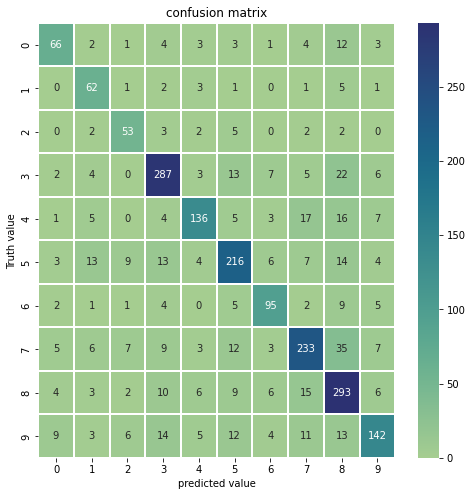

[[ 66   2   1   4   3   3   1   4  12   3]
 [  0  62   1   2   3   1   0   1   5   1]
 [  0   2  53   3   2   5   0   2   2   0]
 [  2   4   0 287   3  13   7   5  22   6]
 [  1   5   0   4 136   5   3  17  16   7]
 [  3  13   9  13   4 216   6   7  14   4]
 [  2   1   1   4   0   5  95   2   9   5]
 [  5   6   7   9   3  12   3 233  35   7]
 [  4   3   2  10   6   9   6  15 293   6]
 [  9   3   6  14   5  12   4  11  13 142]]


In [41]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes_cnn)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes_cnn))

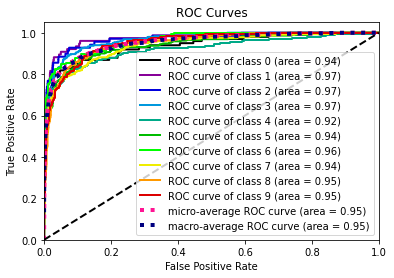

<Figure size 1440x1440 with 0 Axes>

In [42]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions_cnn
skplt.metrics.plot_roc(y_true, y_probas)
plt.figure(figsize=(20,20))
plt.show()

In [94]:
predictions_inc = model_Inception.predict(test_ds, steps = test_steps_per_epoch)

AttributeError: 'Sequential' object has no attribute 'predict_prob'

In [101]:
from sklearn.metrics import roc_curve
fpr_keras,trp_keras,thresholds_keras=roc_curve(true_classes,predictions_inc,pos_label='1')

ValueError: y should be a 1d array, got an array of shape (2093, 10) instead.

In [80]:
from sklearn.metrics import roc_auc_score


In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [82]:

y_true = true_classes
y_probas_cnn = predictions_cnn

y_probas_inc = predictions_inc
y_probas_vgg = predictions
roc_auc_score(true_classes,predictions_cnn,multi_class='ovr')
# cnn=skplt.metrics.plot_roc(y_true, y_probas_cnn,classes_to_plot=[0],figsize=(16,8),plot_micro=False,plot_macro=False,cmap='crest')
# skplt.metrics.plot_roc(y_true, y_probas_vgg,classes_to_plot=[0],figsize=(16,8),ax=cnn,plot_micro=False,plot_macro=False,cmap='cool')
# skplt.metrics.plot_roc(y_true, y_probas_inc,ax=cnn,classes_to_plot=[0],figsize=(16,8),plot_micro=False,plot_macro=False)
# plt.figure(figsize=(20,20))
# plt.legend(['ROC curve of cnn (area = '+'0.93'+')' ,'ROC curve of inception v3 (area = '+'0.96'+')', 'ROC curve of vgg19 (area = '+'0.99'+')'])
plt.show()

In [105]:
cnn=skplt.metrics.plot_roc(y_true, y_probas_inc,classes_to_plot=[0],figsize=(16,8),plot_micro=False,cmap='cool')
plt.show()

In [90]:
from sklearn.metrics import roc_curve,auc

In [91]:
def plot_roc(test_ds,y_true,models):
    
    #models object should be a dictionary comprising of name of model and the model object
    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(test_ds) 
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(test_ds) [:,1]
        fpr,tpr,threshold=roc_curve(y_true,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))
        
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [92]:
models={'cnn':model_cnn,'vgg19':model_vgg,'Inception':model_Inception}
plot_roc(test_ds,y_true,models)

UnboundLocalError: local variable 'probs' referenced before assignment

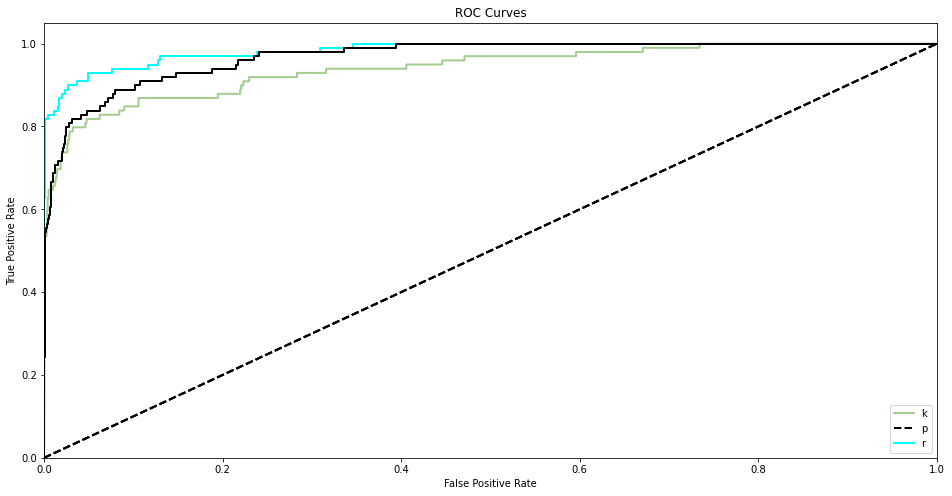

In [93]:

y_true = true_classes
y_probas_cnn = predictions_cnn

y_probas_inc = predictions_inc
y_probas_vgg = predictions
cnn=skplt.metrics.plot_roc(y_true, y_probas_cnn,classes_to_plot=[0],figsize=(16,8),plot_micro=False,plot_macro=False,cmap='crest',)

skplt.metrics.plot_roc(y_true, y_probas_vgg,classes_to_plot=[0],figsize=(16,8),ax=cnn,plot_micro=False,plot_macro=False,cmap='cool')

skplt.metrics.plot_roc(y_true, y_probas_inc,ax=cnn,classes_to_plot=[0],figsize=(16,8),plot_micro=False,plot_macro=False)
plt.legend(['k','p','r'])
# plt.figure(figsize=(20,20))
# plt.legend(['ROC curve of cnn (area = '+'0.93'+')' ,'ROC curve of inception v3 (area = '+'0.96'+')', 'ROC curve of vgg19 (area = '+'0.99'+')'])
plt.show()

In [ ]:

y_true = true_classes
y_probas = predictions_cnn
y_probas_inc = predictions_inc
y_probas_vgg = predictions
cnn=skplt.metrics.plot_roc(y_true, y_probas,classes_to_plot=[0,'bacterial_leaf_blight'],figsize=(16,8),plot_micro=False,cmap='darkorange')
skplt.metrics.plot_roc(y_true, y_probas_vgg,classes_to_plot=[0,'bacterial_leaf_blight'],figsize=(16,8),ax=cnn,plot_micro=False)
skplt.metrics.plot_roc(y_true, y_probas_inc,ax=cnn,classes_to_plot=[0,'bacterial_leaf_blight'],figsize=(16,8),plot_micro=False)
# plt.figure(figsize=(20,20))
plt.show()